Mean Squared Error: 0.007160000000000014
R-squared: 0.9742245773694669


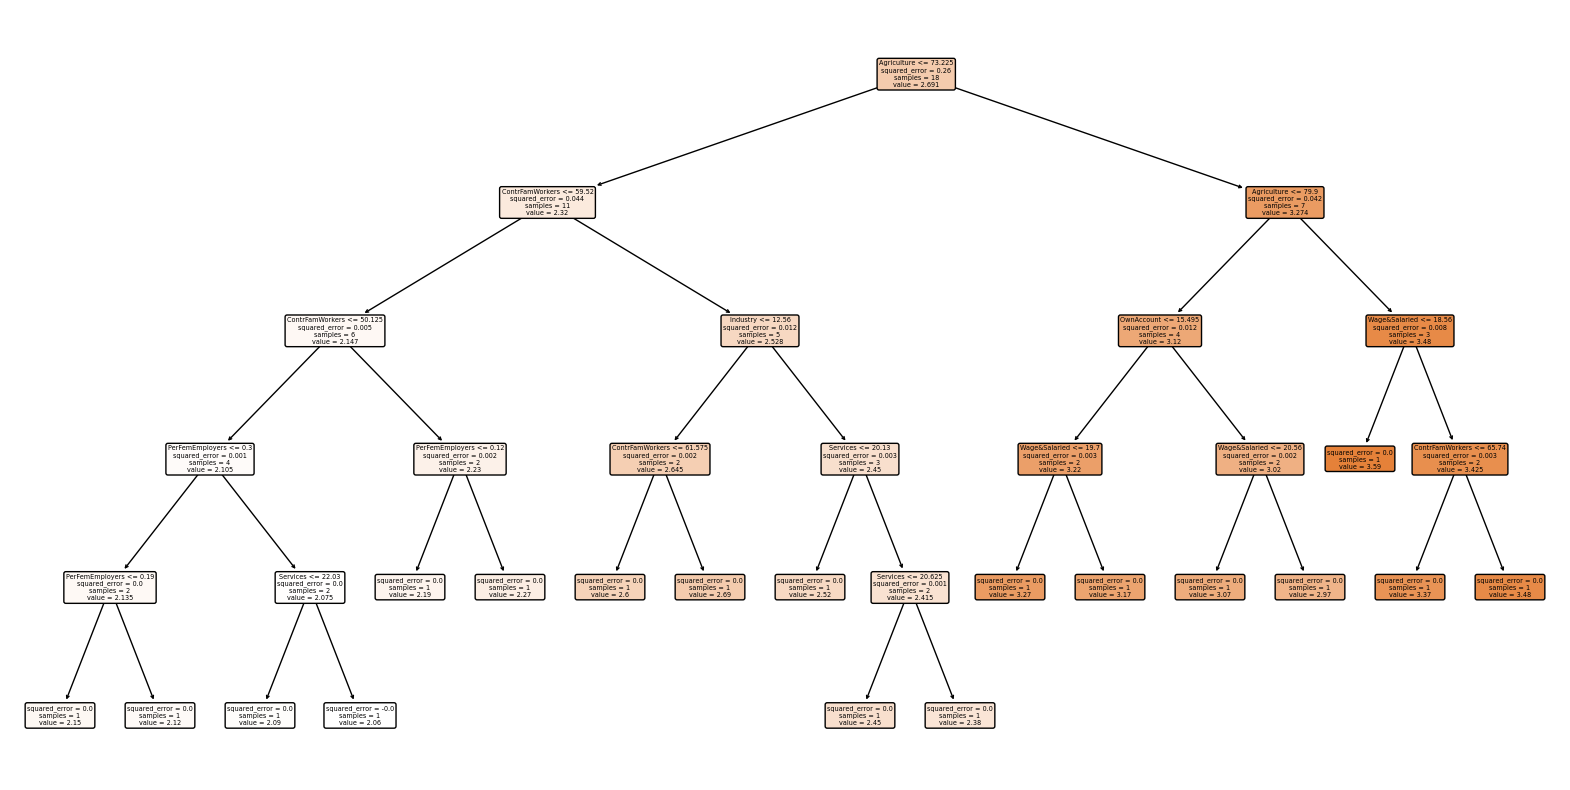

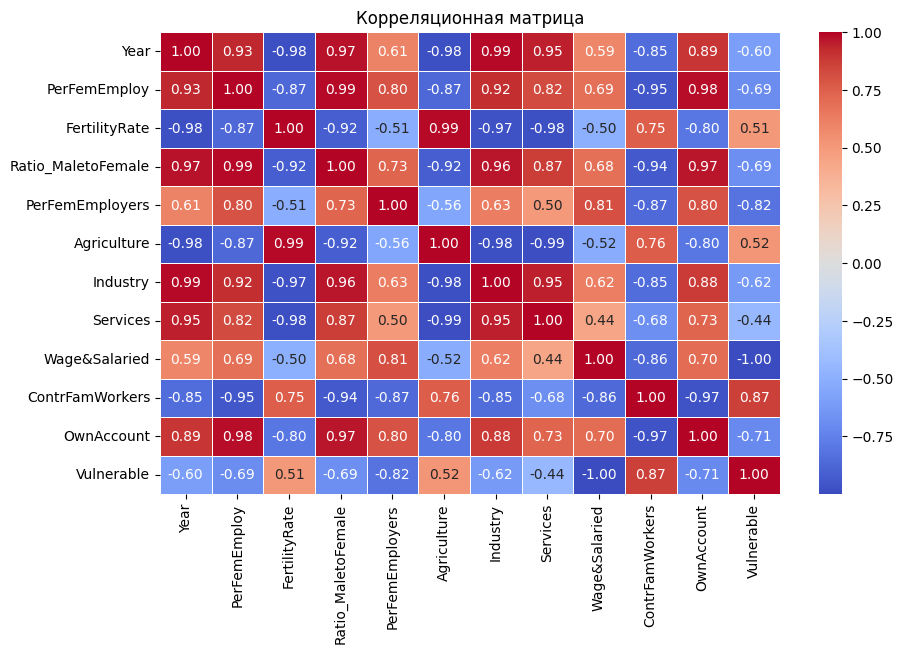

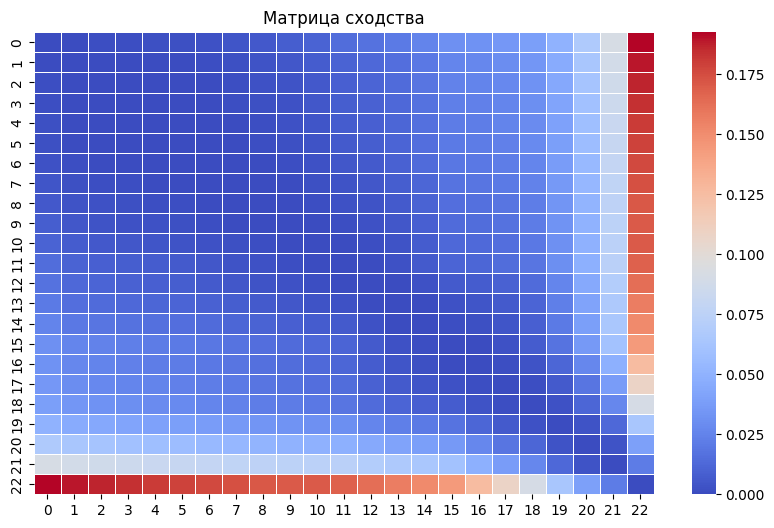

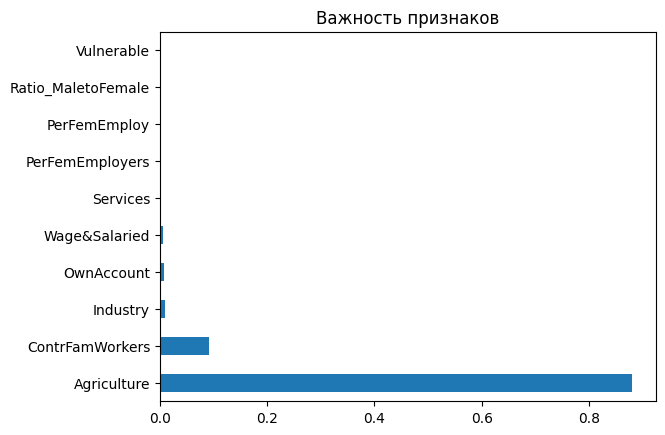

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from scipy.spatial.distance import squareform, pdist

# Загрузка данных
df = pd.read_csv("MLR2.csv")

# Преобразование столбца "FertilityRate" в числовой формат
df['FertilityRate'] = pd.to_numeric(df['FertilityRate'], errors='coerce')

# Удаление строк с отсутствующими значениями в столбце "FertilityRate"
df.dropna(subset=['FertilityRate'], inplace=True)

# Определение независимых и зависимой переменных
X = df.drop(['Year', 'FertilityRate'], axis=1)
y = df['FertilityRate']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели дерева решений
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = model.predict(X_test)

# Оценка точности модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Визуализация дерева решений
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
plt.show()

# Построение корреляционной матрицы
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

# Построение матрицы сходства
distance_matrix = pd.DataFrame(squareform(pdist(X, metric='correlation')), columns=X.index, index=X.index)
plt.figure(figsize=(10, 6))
sns.heatmap(distance_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Матрица сходства')
plt.show()

# Визуализация важности признаков
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Важность признаков')
plt.show()
